# 数据预处理

## 引包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 数据加载


In [2]:
movie_path = 'movies.dat'
rating_path = 'ratings.dat'
user_path = 'users.dat'

In [3]:
movie_data = pd.read_csv(movie_path,sep="::",names=['movie_id','movie_name','movie_type'],header=None,engine="python")
user_date = pd.read_csv(user_path,sep="::",header=None,engine="python",names=["user_id","gender","age","occupation","zip_code"])
rating_data = pd.read_csv(rating_path,sep="::",header=None,names=["user_id","movie_id","rating","timestamp"],engine='python')

## 观察数据

In [4]:
display(movie_data.head(),user_date.head(),rating_data.head())

,movie_id,movie_name,movie_type
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
display(movie_data.info(),rating_data.info(),user_date.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id      3883 non-null int64
movie_name    3883 non-null object
movie_type    3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip_code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


None

None

None

## 数据合并

In [6]:
movie_rating = pd.merge(movie_data,rating_data,on='movie_id')

In [7]:
df = pd.merge(movie_rating,user_date,on='user_id')

In [8]:
df.head()

,movie_id,movie_name,movie_type,user_id,rating,timestamp,gender,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
movie_id      1000209 non-null int64
movie_name    1000209 non-null object
movie_type    1000209 non-null object
user_id       1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip_code      1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


# 数据分析

## 平均分最高的电影 

In [10]:
pd.pivot_table(df,values='rating',index='movie_name',aggfunc='mean').sort_values(by='rating',ascending=False)

,rating
movie_name,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [11]:
df.head()

,movie_id,movie_name,movie_type,user_id,rating,timestamp,gender,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


## 不同性别对电影平均评分

In [12]:
gender_rating = pd.pivot_table(df,values='rating',index='movie_name',columns='gender')

In [13]:
gender_rating.head()

gender,F,M
movie_name,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [14]:
F = gender_rating.sort_values(by='F',ascending=False)[:10]
M = gender_rating.sort_values(by='M',ascending=False)[:10]

In [15]:
F

gender,F,M
movie_name,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J醫閗os) (1997)",5.0,3.166667
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
Ayn Rand: A Sense of Life (1997),5.0,4.000000


In [16]:
M

gender,F,M
movie_name,,
Schlafes Bruder (Brother of Sleep) (1995),NaN,5.0
Small Wonders (1996),3.333333,5.0
"Gate of Heavenly Peace, The (1995)",5.000000,5.0
"Baby, The (1973)",NaN,5.0
Ulysses (Ulisse) (1954),NaN,5.0
Dangerous Game (1993),4.000000,5.0
Angela (1995),3.000000,5.0
"Bells, The (1926)",4.000000,5.0
Smashing Time (1967),NaN,5.0


## 不同性别争议最大电影

In [17]:
gender_rating['diff'] = gender_rating['F'] - gender_rating['M']

In [18]:
gender_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3706 entries, $1,000,000 Duck (1971) to eXistenZ (1999)
Data columns (total 3 columns):
F       3481 non-null float64
M       3671 non-null float64
diff    3446 non-null float64
dtypes: float64(3)
memory usage: 115.8+ KB


In [19]:
gender_rating.sort_values(by='diff',ascending=False,inplace=True)

In [20]:
gender_rating.head()

gender,F,M,diff
movie_name,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [21]:
f = gender_rating.dropna()[:10]
m = gender_rating.dropna()[-10:]
diff = pd.concat([f,m])

In [22]:
diff

gender,F,M,diff
movie_name,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429
Cobra (1925),4.000000,1.500000,2.500000
"Other Side of Sunday, The (S鴑dagsengler) (1996)",5.000000,2.928571,2.071429
Theodore Rex (1995),3.000000,1.000000,2.000000
For the Moment (1994),5.000000,3.000000,2.000000


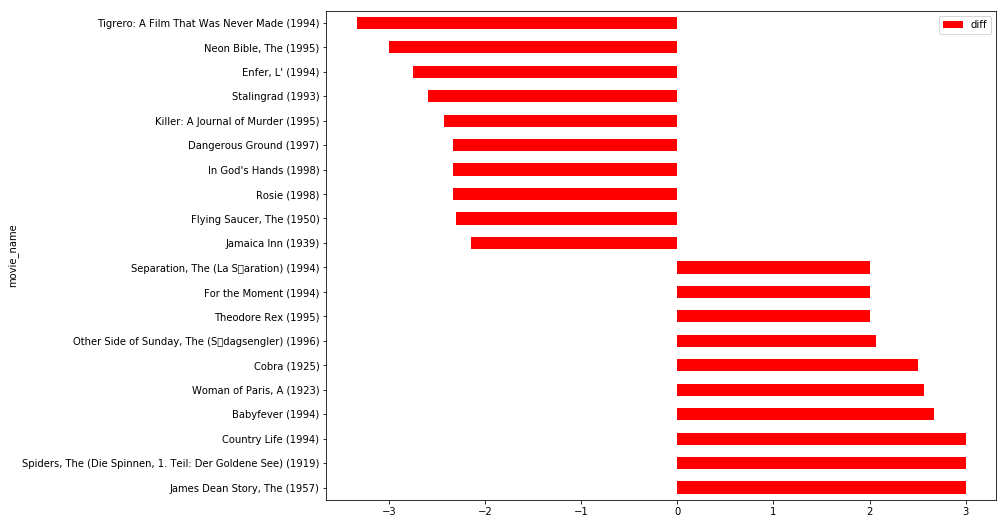

In [23]:
diff.plot(kind='barh',y='diff',figsize=(12,9),color='red')

## 评分次数最多的电影

In [24]:
rating_counts = df.groupby('movie_name').size()

In [25]:
rating_counts.sort_values(ascending=False)

movie_name
American Beauty (1999)                                                   3428
Star Wars: Episode IV - A New Hope (1977)                                2991
Star Wars: Episode V - The Empire Strikes Back (1980)                    2990
Star Wars: Episode VI - Return of the Jedi (1983)                        2883
Jurassic Park (1993)                                                     2672
Saving Private Ryan (1998)                                               2653
Terminator 2: Judgment Day (1991)                                        2649
Matrix, The (1999)                                                       2590
Back to the Future (1985)                                                2583
Silence of the Lambs, The (1991)                                         2578
Men in Black (1997)                                                      2538
Raiders of the Lost Ark (1981)                                           2514
Fargo (1996)                                         

## 不同年龄段争议最大的电影

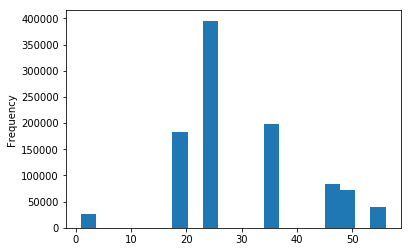

In [26]:
df['age'].plot(kind='hist',bins=20)

In [27]:
df.age.max()

56

### 使用pandas.cut（）函数将用户年龄分组

In [28]:
bins = [0,17,24,34,44,49,55,56]
df['age_range'] =  pd.cut(df['age'],bins,labels=['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])

In [29]:
df[df['age']==18]

,movie_id,movie_name,movie_type,user_id,rating,timestamp,gender,age,occupation,zip_code,age_range
770,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18,3,95825,18-24
771,2,Jumanji (1995),Adventure|Children's|Fantasy,18,2,978152541,F,18,3,95825,18-24
772,10,GoldenEye (1995),Action|Adventure|Thriller,18,5,978153344,F,18,3,95825,18-24
773,17,Sense and Sensibility (1995),Drama|Romance,18,4,978156535,F,18,3,95825,18-24
774,26,Othello (1995),Drama,18,4,978157335,F,18,3,95825,18-24
775,29,"City of Lost Children, The (1995)",Adventure|Sci-Fi,18,3,978154361,F,18,3,95825,18-24
776,34,Babe (1995),Children's|Comedy|Drama,18,5,978155186,F,18,3,95825,18-24
777,44,Mortal Kombat (1995),Action|Adventure,18,4,978153795,F,18,3,95825,18-24
778,47,Seven (Se7en) (1995),Crime|Thriller,18,1,978155654,F,18,3,95825,18-24
779,48,Pocahontas (1995),Animation|Children's|Musical|Romance,18,4,978155072,F,18,3,95825,18-24


#### 使用指定轴上的一个或多个操作进行聚合

In [30]:
df.groupby('age_range').agg({'rating':[np.size,np.mean]})

rating          
             size      mean
age_range                  
Under 18    27211  3.549520
18-24      183536  3.507573
25-34      395556  3.545235
35-44      199003  3.618162
45-49       83633  3.638062
50-55       72490  3.714512
56+         38780  3.766632

In [31]:
df.groupby('age_range').agg({'rating':[np.size,np.mean]})

rating          
             size      mean
age_range                  
Under 18    27211  3.549520
18-24      183536  3.507573
25-34      395556  3.545235
35-44      199003  3.618162
45-49       83633  3.638062
50-55       72490  3.714512
56+         38780  3.766632